<a href="https://colab.research.google.com/github/Andoresilva/DataScience/blob/main/C%C3%B3pia_de_TutorialGala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I WORKSHOP DO PGF - UNIFEI
# Astrofísica computacional: Gala, um pacote para dinâmica galáctica

<img src="https://gala.adrian.pw/en/latest/_static/Gala_Logo_RGB.png" alt="image" width="400" height="auto">
<img src="https://www.astropy.org/images/astropy_project_logo.svg" alt="image" width="400" height="auto">


gala user guide: https://gala.adrian.pw/en/latest/user_guide.html

# Instalação de pacotes necessários

In [ ]:
%pip install astropy gala numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 81.1 MB/s eta 0:00:00


# Estrutura interna do pacote: programação orientada à objetos

- gala.coordinates
- gala.integrate
- gala.potential
- gala.dynamics
- gala.units
- gala.utils

## Importando os pacotes que vamos utilizar

In [ ]:
import astropy
import astropy.units as u
import astropy.coordinates as coord

import gala.dynamics as gd
import gala.potential as gp
import gala.integrate as gi
from gala.units import UnitSystem

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# astropy.units: variáveis "com unidades"

In [ ]:
distance = 10 * u.kpc
print(distance)
print(distance.value)
distance.unit

10.0 kpc
10.0


Unit("kpc")

In [ ]:
masses = np.ones(10) * u.Msun
print(masses)
print(masses.value)
print(masses.unit)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] solMass
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
solMass


In [ ]:
velocity = distance / (10 * u.yr)
print(velocity)
print(velocity.value)
print(velocity.unit)

1.0 kpc / yr
1.0
kpc / yr


In [ ]:
distance.to(u.au)

<Quantity 2.06264806e+09 AU>

# gala.units: sistemas de unidades

In [ ]:
usys = UnitSystem(u.kpc, u.Gyr, u.rad, u.Msun * 1e10)
usys

<UnitSystem (kpc, Gyr, 10000000000.0 solMass, rad)>

In [ ]:
type(usys['length'])


astropy.units.core.PrefixUnit

In [ ]:
usys.get_constant('c')

306601.3937855506

# astropy.coordinates: sistemas de coordenadas

<center>
<img src="https://auger.org/education/Auger_Education/photos/galactic.png" alt="image" width="400" height="auto">
<img src="https://astronomy.swin.edu.au/cms/cpg15x/albums/userpics/galacticcoords.2.jpg" alt="image" width="400" height="auto">
</center>

In [ ]:
coord.galactocentric_frame_defaults.set('v4.0');

In [ ]:
from_earth = coord.ICRS(ra=100.68458*u.degree, dec=41.26917*u.degree, distance = 10 * u.kpc)
from_earth

<ICRS Coordinate: (ra, dec, distance) in (deg, deg, kpc)
    (100.68458, 41.26917, 10.)>

In [ ]:
galactic = coord.Galactic()
from_earth.transform_to(galactic)

<Galactic Coordinate: (l, b, distance) in (deg, deg, kpc)
    (174.31037117, 15.98464447, 10.)>

In [ ]:
galcen = coord.Galactocentric()
from_GalCenter = from_earth.transform_to(galcen)

In [ ]:
from_GalCenter.data

<CartesianRepresentation (x, y, z) in kpc
    (-17.6808882, 0.95306936, 2.79907391)>

In [ ]:
from_GalCenter.data.z

<Quantity 2.79907391 kpc>

In [ ]:
from_GalCenter.data.z.to(u.au)

<Quantity 5.77350438e+08 AU>

# gala.potential: potenciais

In [ ]:
MW = gp.MilkyWayPotential(units=usys)
MW

<CompositePotential disk,bulge,nucleus,halo>

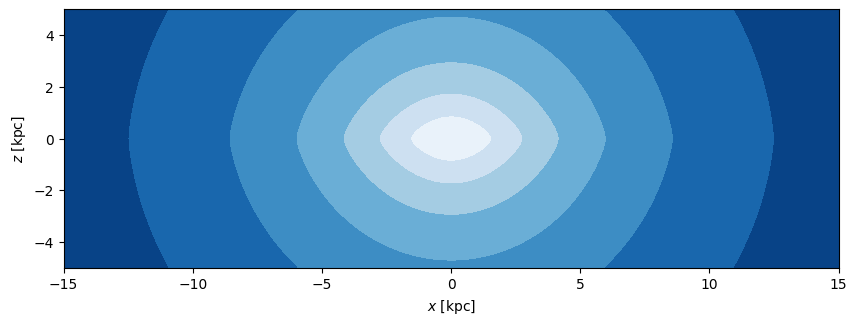

In [ ]:
x_c = np.linspace(-15,15,200)
y_c = np.linspace(-15,15,200)
z_c = np.linspace(-5,5,200)
fig, ax = plt.subplots(figsize=(10,5))

ax.set_xlabel('$x$ [kpc]')
ax.set_ylabel('$z$ [kpc]')
ax.set_aspect('equal')

fig = MW.plot_contours((x_c,1.,z_c), ax=ax)

In [ ]:
disk = gp.MiyamotoNagaiPotential(m=1, a=6.5, b=0.27, units=usys)
bulge = gp.HernquistPotential(m=0.5, c=0.7, units=usys)
potential = gp.CCompositePotential(disk=disk, bulge=bulge)
potential['bulge']

<HernquistPotential: m=0.50, c=0.70 (kpc,Gyr,10000000000.0 solMass,rad)>

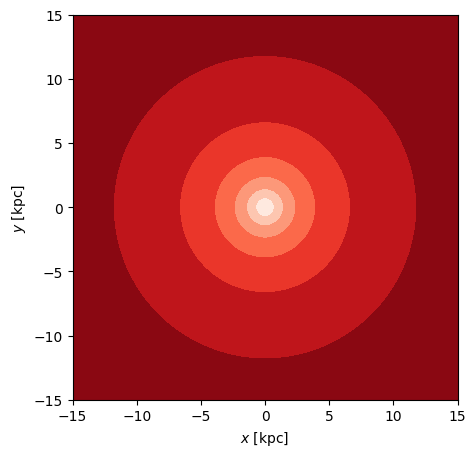

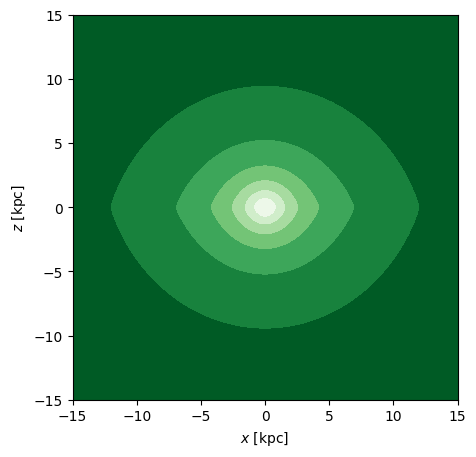

In [ ]:
x_c = np.linspace(-15,15,100)
y_c = np.linspace(-15,15,100)
z_c = np.linspace(-15,15,100)

fig1, ax1 = plt.subplots(figsize=(5,5))
fig2, ax2 = plt.subplots(figsize=(5,5))

ax1.set_xlabel('$x$ [kpc]')
ax1.set_ylabel('$y$ [kpc]')
ax1.set_aspect('equal')
ax2.set_xlabel('$x$ [kpc]')
ax2.set_ylabel('$z$ [kpc]')
ax2.set_aspect('equal')

fig1 = potential.plot_contours(grid=(x_c,y_c,1.), ax=ax1, cmap='Reds')
fig2 = potential.plot_contours(grid=(x_c,1.,z_c), ax=ax2, cmap='Greens')

# gala.dynamics: dinâmica

In [ ]:
w = gd.PhaseSpacePosition(pos=[10,0,2.0] * u.kpc,
                             vel=[0,175,0] * u.km/u.s)
w

<PhaseSpacePosition cartesian, dim=3, shape=()>

In [ ]:
w_spherical = w.represent_as('spherical')
w_spherical.distance

<Distance 10.19803903 kpc>

In [ ]:
w_galactic = w.to_coord_frame(galactic)
w_galactic

<Galactic Coordinate: (l, b, distance) in (deg, deg, kpc)
    (6.27063602e-05, 6.37953188, 18.22973262)
 (pm_l_cosb, pm_b, radial_velocity) in (mas / yr, mas / yr, km / s)
    (-0.81696418, -0.07328787, -13.66841948)>

In [ ]:
w_galcen = w.to_coord_frame(galcen)
w_galcen

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg): (x, y, z) in kpc
    (10., 0., 2.)
 (v_x, v_y, v_z) in km / s
    (0., 175., 0.)>

In [ ]:
print(w.pos)
print(w.vel)
print(w.frame)
print(w.pos.x)
print(w.vel.d_x)

(10., 0., 2.) kpc
(0., 175., 0.) km / s
None
10.0 kpc
0.0 km / s


In [ ]:
orbit = MW.integrate_orbit(w, dt=0.001, n_steps=300)

In [ ]:
print(orbit)

pos=[(10.        ,  0.        ,  2.        ),
 ( 9.99755306,  0.17897463,  1.99918622),
 ( 9.99021234,  0.35786165,  1.99674487),
 ( 9.97797815,  0.53657338,  1.99267592),
 ( 9.96085104,  0.71502199,  1.98697932),
 ( 9.93883175,  0.89311943,  1.97965502),
 ( 9.91192127,  1.07077733,  1.97070294),
 ( 9.88012082,  1.24790697,  1.960123  ),
 ( 9.84343188,  1.42441918,  1.94791509),
 ( 9.80185621,  1.60022424,  1.93407912),
 ( 9.75539584,  1.77523183,  1.918615  ),
 ( 9.70405314,  1.94935097,  1.90152264),
 ( 9.64783078,  2.12248988,  1.88280197),
 ( 9.58673184,  2.29455595,  1.86245293),
 ( 9.52075977,  2.46545566,  1.8404755 ),
 ( 9.44991845,  2.63509445,  1.81686971),
 ( 9.37421226,  2.80337668,  1.79163561),
 ( 9.29364606,  2.97020551,  1.76477335),
 ( 9.20822531,  3.13548285,  1.73628313),
 ( 9.11795604,  3.29910923,  1.70616525),
 ( 9.02284499,  3.46098373,  1.67442012),
 ( 8.92289961,  3.62100387,  1.64104828),
 ( 8.81812817,  3.77906555,  1.60605042),
 ( 8.7085398 ,  3.9350629 ,  1

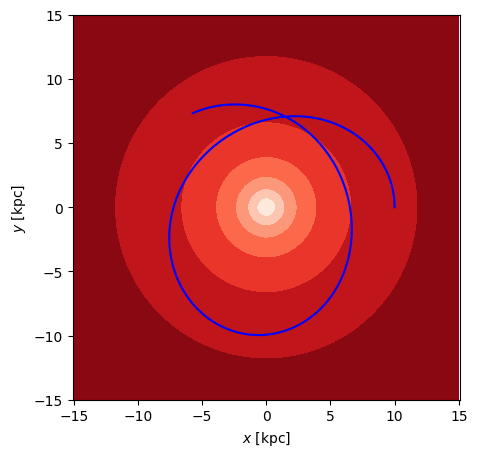

In [ ]:
orbit.plot(['x', 'y'], axes=ax1, color='blue')

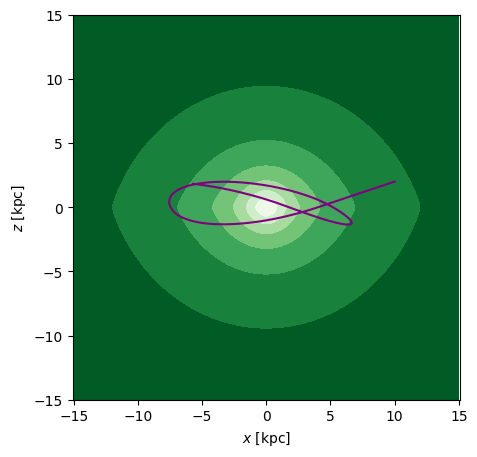

In [ ]:
orbit.plot(['x', 'z'], axes=ax2, color='purple')

# Exercício

Repita o procedimento de integração sobre um potencial analítico, porém dessa vez utilizando várias partículas-teste (várias posições no espaço de fase). Experimente utilizar diferentes potenciais e diferentes condições iniciais.

Dica: ao invés de utilizar um único objeto, **utilize arrays**:
```python
pos_array = ???
vel_array = ???
w = gd.PhaseSpacePosition(pos=pos_array * u.kpc,
                             vel=vel_array * u.km/u.s)
```
Assim, após a integração, cada linha da matriz `orbit` irá armazenar (ao invés de um) vários vetores de posições (um para cada partícula). Cada índice representa um instante no tempo.
```python
orbit[0] # posições de todas as partículas ao início da simulação
orbit[11] # posições de todas as partículas no 10° passo de tempo
orbit[-1] # posições de todas as partículas ao fim da simulação
```

**Cuidado!** Os arrays que contém informações de várias partículas devem ter um formato específico, confira https://gala.adrian.pw/en/latest/conventions.html#array-shapes

# Ademais

É encorajado explorar os vários tutoriais, bem como o user guide, presentes no site do projeto: https://gala.adrian.pw/

Existem outros pacotes interessantes e muito úteis para pesquisa em dinâmica galáctica:
* https://www.galpy.org/
* https://github.com/GalacticDynamics-Oxford/Agama

Livro-texto online sobre dinâmica galáctica:
* https://galaxiesbook.org/